In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [3]:
data = pd.DataFrame(np.array([[1, 4, 1, 5], [3, 2, 4, 3], [1, 1.5, 2, 1]]), columns=["x", "y", "z","k"])
data.head(5)

,x,y,z,k
0,1.0,4.0,1.0,5.0
1,3.0,2.0,4.0,3.0
2,1.0,1.5,2.0,1.0


In [17]:
def parallel_coordinates(data, **kwargs):
    labels = data.columns
    colors = 
    dim = data.shape[1]
    fig, axes = plt.subplots(1, dim-1, **kwargs)
    fig.subplots_adjust(wspace=0)
    min_values = data.min(axis=0).values
    max_values = data.max(axis=0).values
    min_values -= (max_values-min_values)*0.05
    max_values += (max_values-min_values)*0.05

    for i, ax in enumerate(axes):
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.set_major_locator(ticker.FixedLocator([0]))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter([labels[i]]))
        ax.set_xlim([0, 1])
        ax.set_ylim([min_values[i], max_values[i]])

    ax_twin = plt.twinx(axes[-1])
    ax_twin.spines['top'].set_visible(False)
    ax_twin.spines['bottom'].set_visible(False)
    ax_twin.xaxis.set_major_locator(ticker.FixedLocator([0, 1]))
    ax_twin.xaxis.set_major_formatter(ticker.FixedFormatter([labels[-2], labels[-1]]))
    ax_twin.set_ylim([min_values[-1]-1, max_values[-1]+1])
    ax_twin.set_xlim([0, 1])

    x_coords = np.vstack((np.zeros(data.shape[0]), np.ones(data.shape[0])))
    for i in range(dim-1):
        y_coords = data.iloc[:, i:i+2].values
        y_coords_relative = (y_coords-min_values[i:i+2])/(max_values[i:i+2]-min_values[i:i+2])
        axes[i].plot(x_coords, y_coords_relative.T, transform=axes[i].transAxes, lw=4)
    return fig, axes

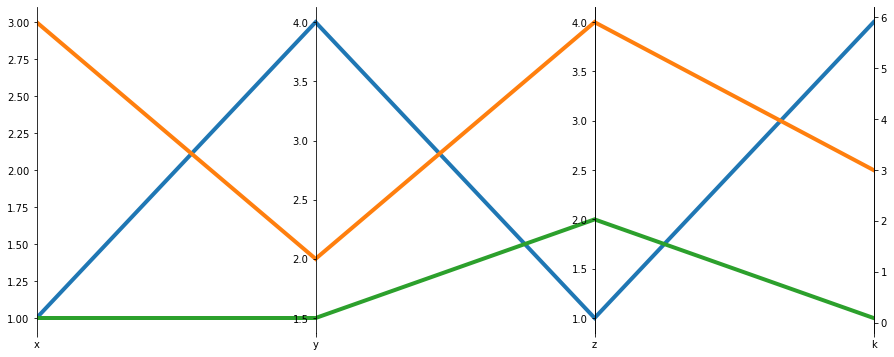

In [18]:
fig,axes = parallel_coordinates(data,figsize=(15,6))
plt.show()